In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv("housing.csv")

In [50]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
data.dropna(inplace = True)


In [53]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [55]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

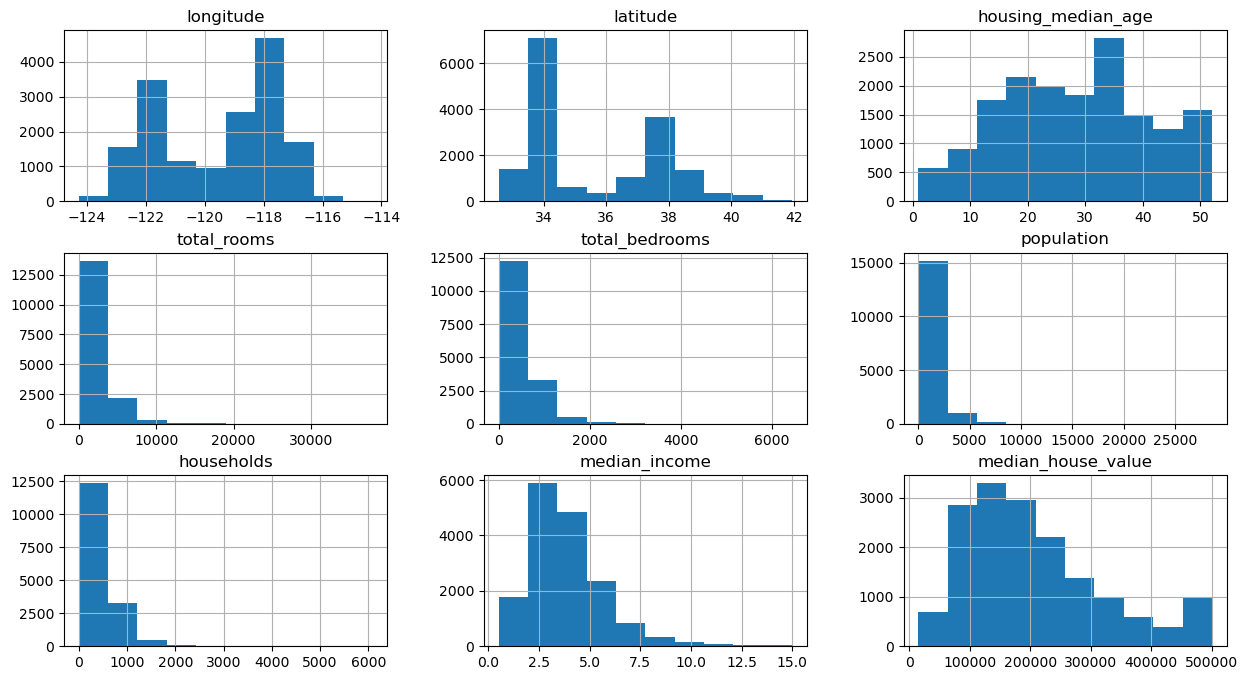

In [56]:
train_data.hist(figsize=(15,8))

In [57]:
numeric_data1 = train_data.drop(['ocean_proximity'], axis=1)

In [58]:
numeric_data1.corr() # correlation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923956,-0.109429,0.046706,0.070317,0.103307,0.057539,-0.018843,-0.051025
latitude,-0.923956,1.000000,0.011297,-0.039208,-0.069032,-0.112483,-0.073868,-0.077372,-0.140226
housing_median_age,-0.109429,0.011297,1.000000,-0.359559,-0.317775,-0.297167,-0.299306,-0.122693,0.106015
total_rooms,0.046706,-0.039208,-0.359559,1.000000,0.929693,0.865005,0.919319,0.199493,0.132406
total_bedrooms,0.070317,-0.069032,-0.317775,0.929693,1.000000,0.885843,0.980280,-0.006517,0.049343
population,0.103307,-0.112483,-0.297167,0.865005,0.885843,1.000000,0.913198,0.009168,-0.025837
households,0.057539,-0.073868,-0.299306,0.919319,0.980280,0.913198,1.000000,0.015098,0.064358
median_income,-0.018843,-0.077372,-0.122693,0.199493,-0.006517,0.009168,0.015098,1.000000,0.687571
median_house_value,-0.051025,-0.140226,0.106015,0.132406,0.049343,-0.025837,0.064358,0.687571,1.000000


<Axes: >

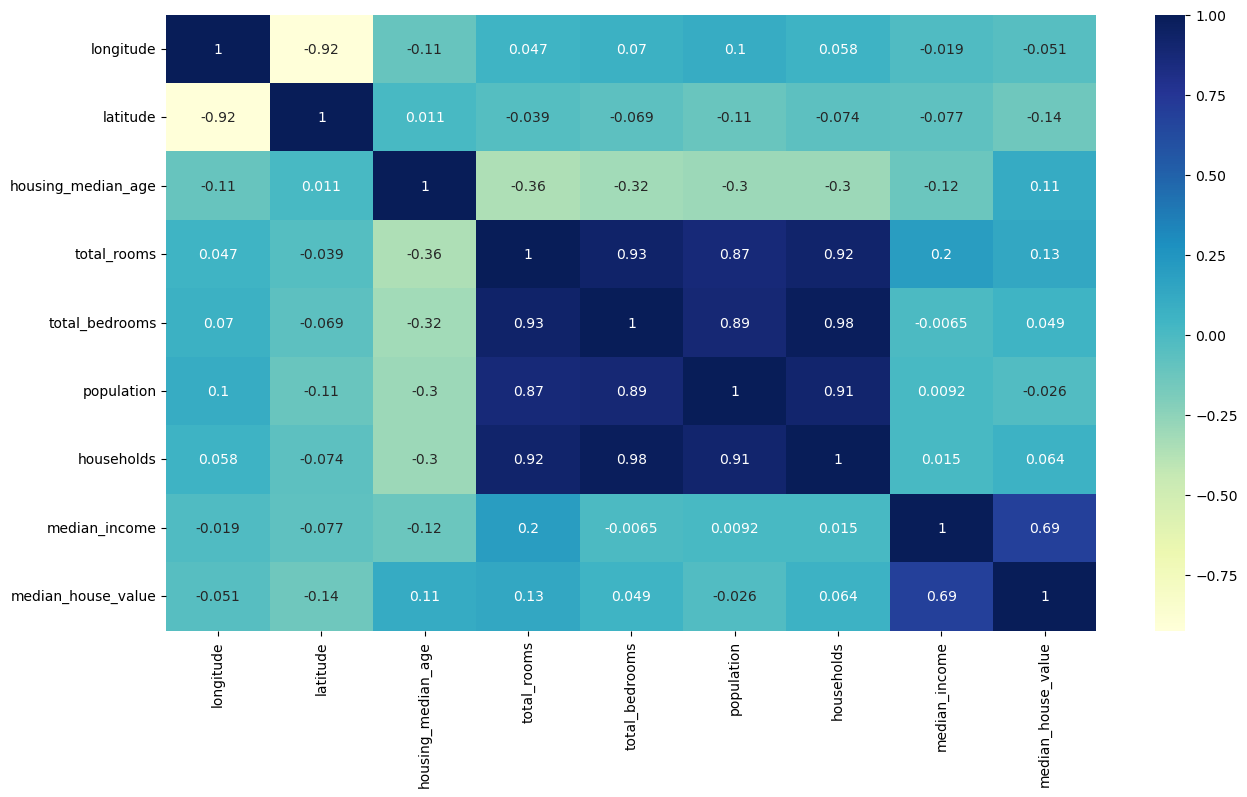

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data1.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='ocean_proximity', ylabel='count'>

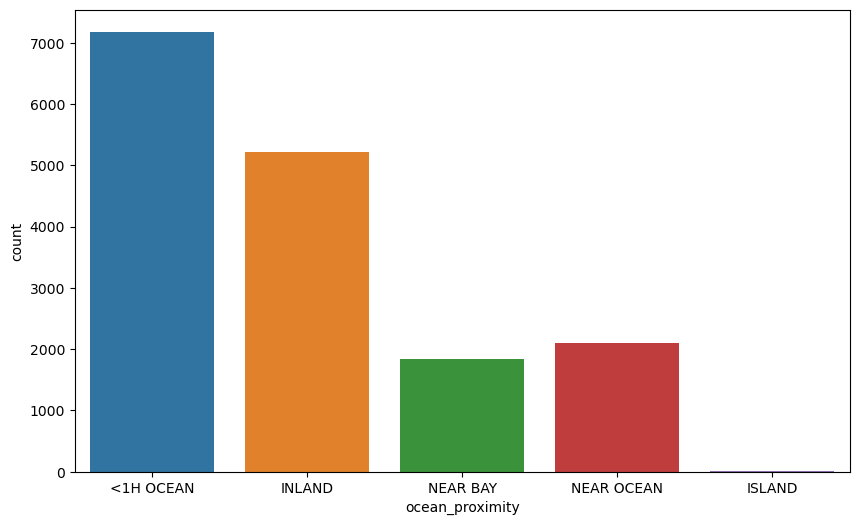

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=train_data)

In [61]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

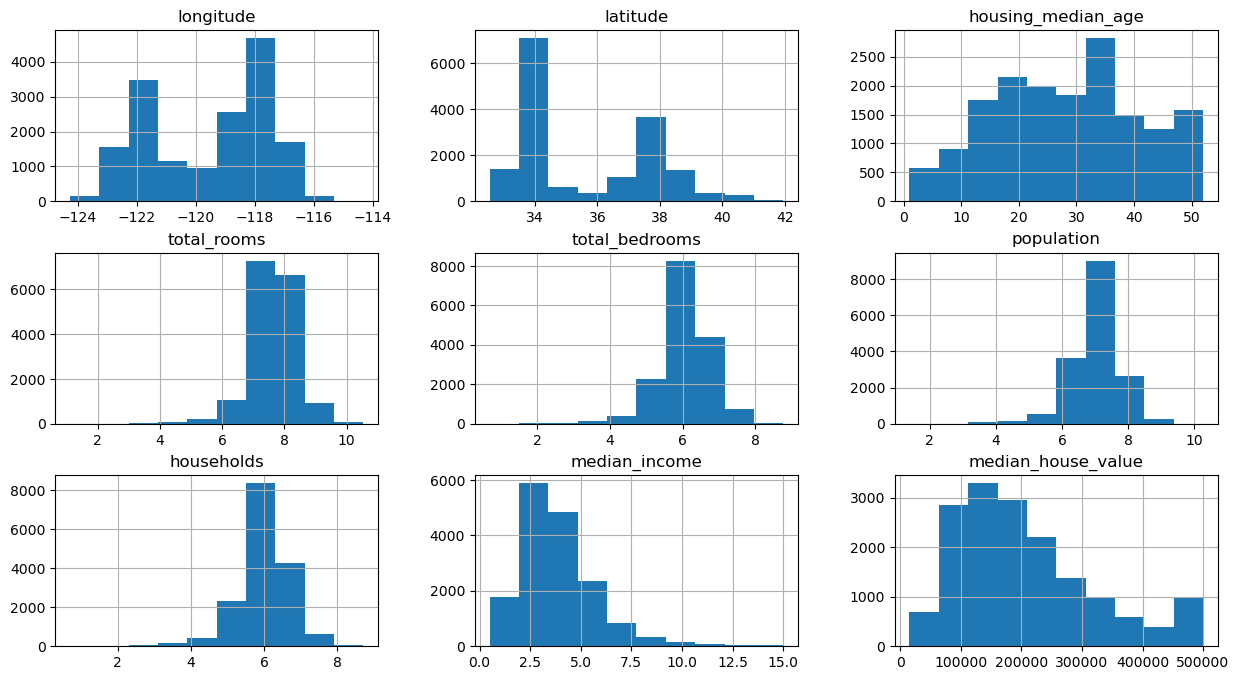

In [62]:
train_data.hist(figsize=(15,8))

In [63]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7183
INLAND        5222
NEAR OCEAN    2107
NEAR BAY      1831
ISLAND           3
Name: count, dtype: int64

In [64]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [65]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7711,-118.14,33.95,36.0,7.571988,5.874931,6.793466,5.855072,3.6635,282100.0,True,False,False,False,False
19780,-122.68,41.15,32.0,6.706862,5.332719,5.416100,4.499810,3.6310,90400.0,False,True,False,False,False
560,-122.24,37.76,52.0,7.521318,6.156979,6.719013,6.102559,2.6833,240900.0,False,False,False,True,False
9850,-121.89,36.60,19.0,6.487684,5.303305,5.517453,5.159055,1.2656,500000.0,True,False,False,False,False
14727,-117.01,32.79,33.0,8.298042,6.498282,7.531016,6.499787,4.3152,159300.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6131,-117.98,34.07,15.0,8.173011,6.790097,8.049427,6.714171,3.0184,139400.0,False,True,False,False,False
15068,-116.97,32.78,37.0,7.135687,5.476464,6.510258,5.631212,3.7019,138600.0,True,False,False,False,False
14692,-117.11,32.79,16.0,7.853605,6.648985,7.029973,6.582025,3.3849,96900.0,False,False,False,False,True
232,-122.19,37.80,52.0,7.503290,5.605802,6.458338,5.627621,4.0114,263400.0,False,False,False,True,False


<Axes: >

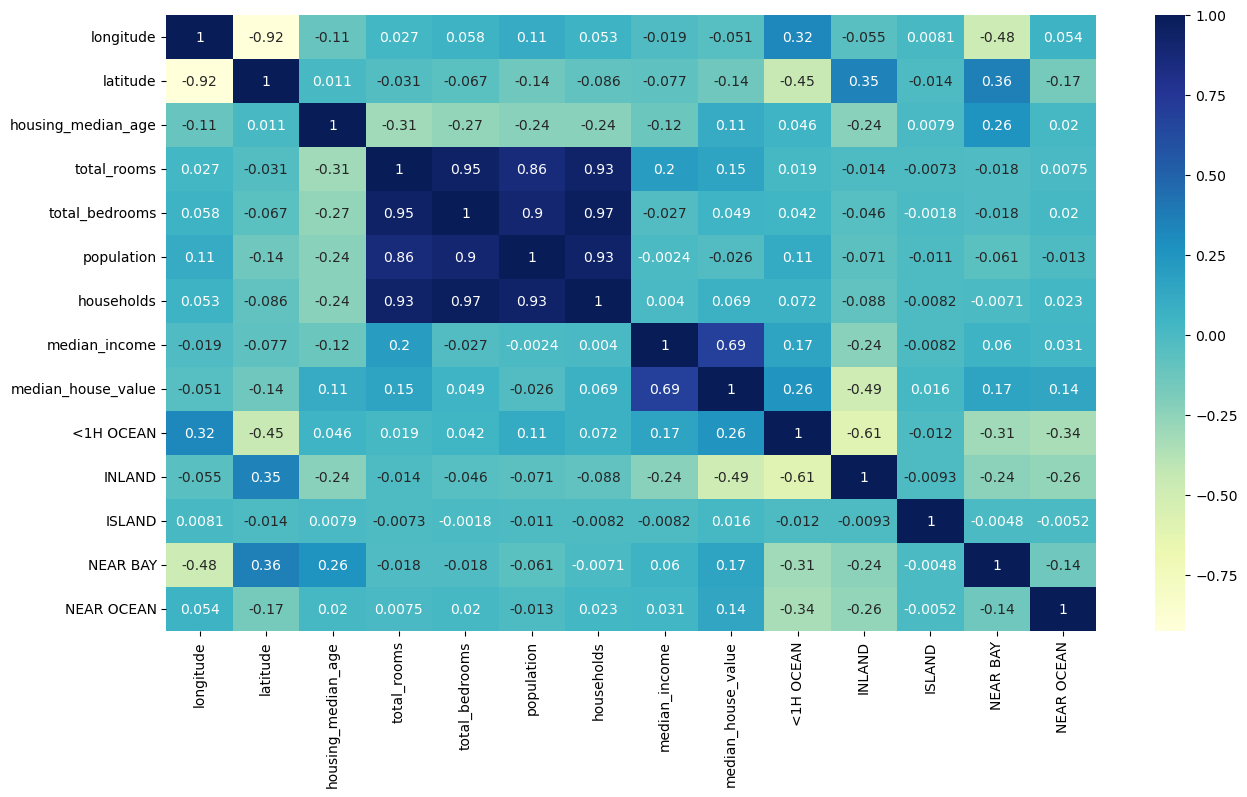

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

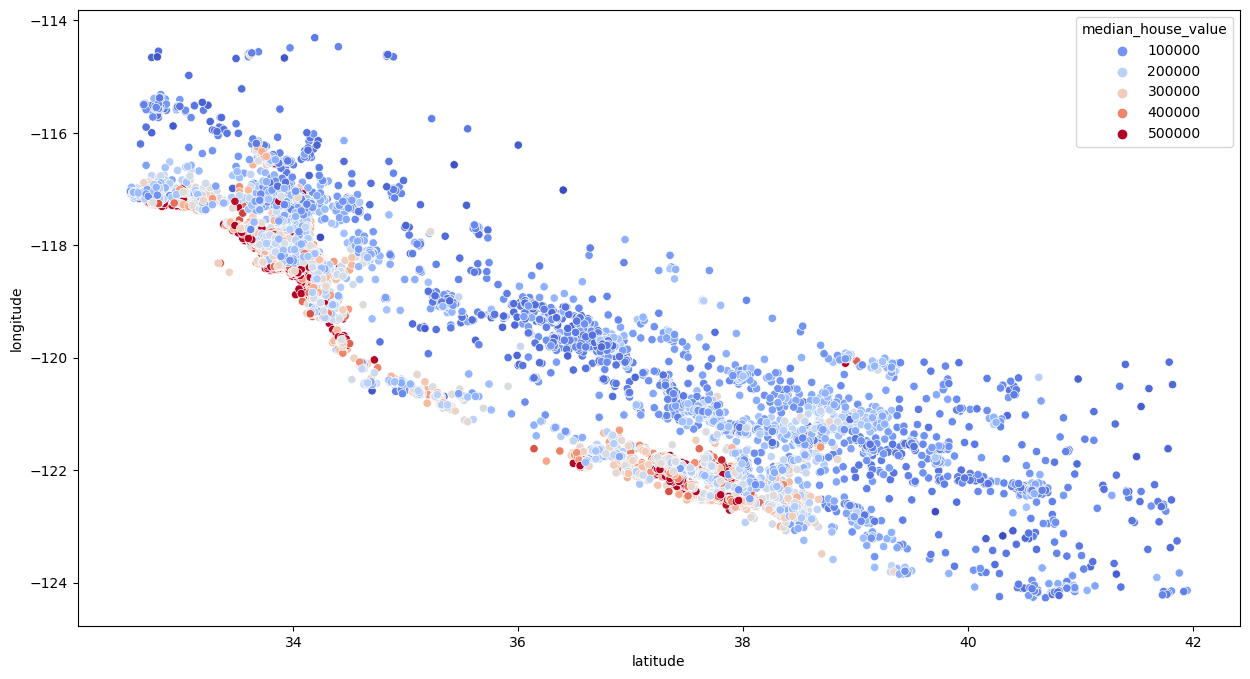

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [68]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

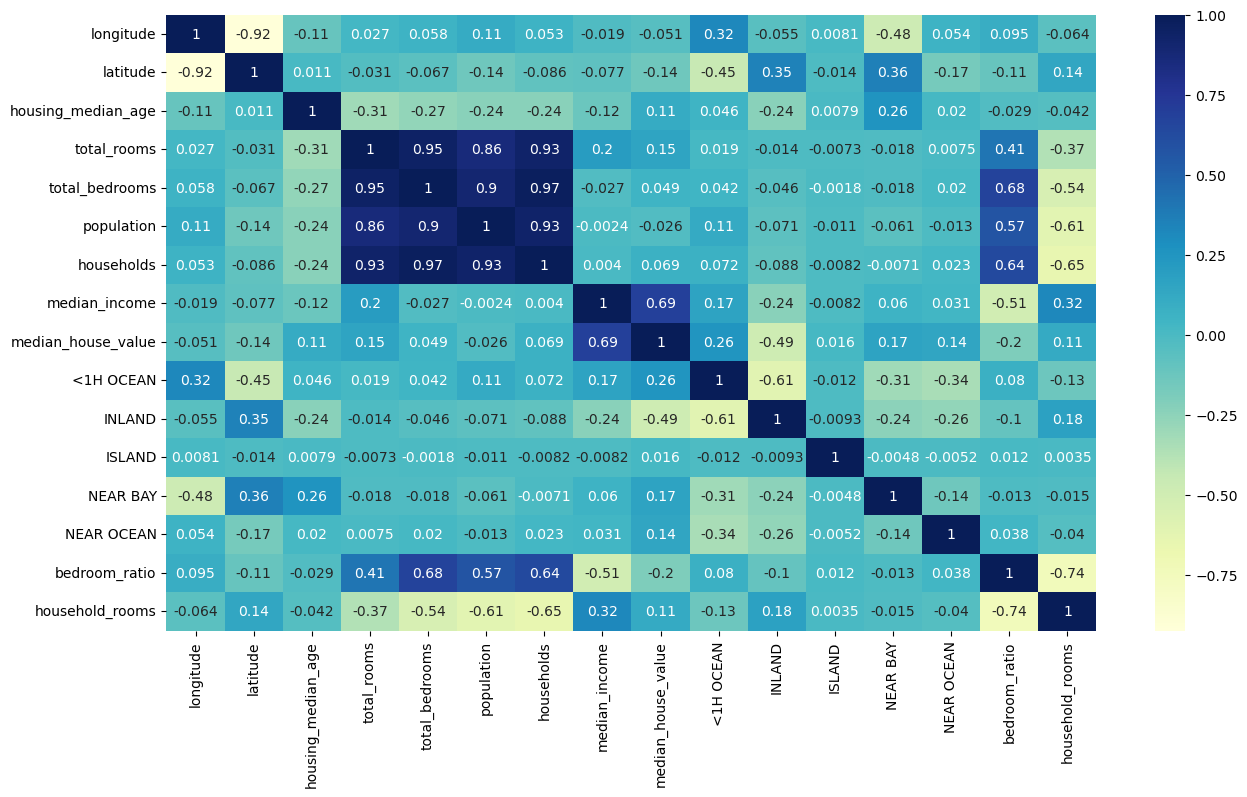

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [71]:
test_data = x_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5953,-117.86,34.13,33.0,2383.0,428.0,1269.0,421.0,4.6360,INLAND,245500.0
7223,-118.16,34.02,34.0,1474.0,511.0,1962.0,501.0,1.8715,<1H OCEAN,139600.0
3256,-120.13,35.87,26.0,48.0,8.0,13.0,8.0,2.3750,INLAND,71300.0
11005,-117.79,33.77,23.0,3596.0,451.0,1292.0,458.0,8.5403,<1H OCEAN,451300.0
15411,-117.23,33.21,34.0,544.0,108.0,348.0,127.0,4.1250,<1H OCEAN,164600.0
...,...,...,...,...,...,...,...,...,...,...
10471,-117.72,33.49,4.0,3623.0,734.0,1129.0,530.0,5.7281,<1H OCEAN,500001.0
2725,-115.55,32.79,22.0,565.0,162.0,692.0,141.0,1.2083,INLAND,53600.0
11715,-120.12,39.18,17.0,2839.0,525.0,390.0,189.0,3.5667,INLAND,179200.0
8182,-118.10,33.80,37.0,1814.0,329.0,850.0,328.0,5.0574,<1H OCEAN,240800.0


In [72]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

In [73]:
test_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     1851
INLAND        1274
NEAR OCEAN     521
NEAR BAY       439
ISLAND           2
Name: count, dtype: int64

In [74]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [75]:
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [76]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [77]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5953,-117.86,34.13,33.0,7.776535,6.061457,7.146772,6.045005,4.6360,245500.0,False,True,False,False,False,0.779455,1.286440
7223,-118.16,34.02,34.0,7.296413,6.238325,7.582229,6.218600,1.8715,139600.0,True,False,False,False,False,0.854985,1.173321
3256,-120.13,35.87,26.0,3.891820,2.197225,2.639057,2.197225,2.3750,71300.0,False,True,False,False,False,0.564575,1.771244
11005,-117.79,33.77,23.0,8.187855,6.113682,7.164720,6.129050,8.5403,451300.0,True,False,False,False,False,0.746677,1.335909
15411,-117.23,33.21,34.0,6.300786,4.691348,5.855072,4.852030,4.1250,164600.0,True,False,False,False,False,0.744566,1.298587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,-117.72,33.49,4.0,8.195334,6.599870,7.029973,6.274762,5.7281,500001.0,True,False,False,False,False,0.805321,1.306079
2725,-115.55,32.79,22.0,6.338594,5.093750,6.541030,4.955827,1.2083,53600.0,False,True,False,False,False,0.803609,1.279018
11715,-120.12,39.18,17.0,7.951559,6.265301,5.968708,5.247024,3.5667,179200.0,False,True,False,False,False,0.787934,1.515442
8182,-118.10,33.80,37.0,7.503841,5.799093,6.746412,5.796058,5.0574,240800.0,True,False,False,False,False,0.772817,1.294646


In [78]:
x_test_s = scaler.transform(x_test)

In [79]:
reg.score(x_test_s, y_test)

0.6691952745127454

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [81]:
forest.score(x_test_s, y_test)

0.8129261789779404

In [ ]:
#cross validation
#10 folds, 9 for training
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split":[2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring= "neg_mean_squared_error",
                          return_train_score= True)
grid_search.fit(x_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

In [ ]:
grid_searh.best_estimator_

In [ ]:
grid_search.best_estimator_.score(x_test_s, y_test)